In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import clear_output

!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py -O fields.py
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/upshot-trump-emolex/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt -P data
clear_output()

In [3]:
import pandas as pd
filepath = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
nrc = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
nrc.head(20)

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [4]:
nrc = nrc[(nrc != 0).all(1)] # 유의미한 라벨만 추출 association 값이 1인 것만
nrc = nrc.reset_index(drop = True) # index reset
nrc.head(10)

,word,emotion,association
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
5,abandoned,fear,1
6,abandoned,negative,1
7,abandoned,sadness,1
8,abandonment,anger,1
9,abandonment,fear,1


In [5]:
created_at = ['20.03.22', '20.03.23', '20.03.24', '20.03.25', '20.03.26', '20.03.27', '20.03.28', 
              '20.03.29', '20.03.30', '20.03.31', '20.04.01', '20.04.02', '20.04.03', '20.04.04']
sentiments = ['trust', 'joy', 'anger', 'sadness', 'fear', 'disgust', 'surprise', 'anticipation']
daily_report = pd.DataFrame(index = created_at, columns = sentiments)

In [6]:
import fields
import numpy as np
import json

fieldsFilter = fields.fields
fileN = '/content/drive/MyDrive/covid analysis/preprocessed_stem_1/stem_preprocssed_0401.json'
text_object = []
with open(fileN, 'r') as json_file:
  for line in json_file:
    text_object.append(json.loads(line))

tw = pd.json_normalize(text_object)
tw = tw.loc[:, tw.columns.isin(fieldsFilter)]

def sentiment(text) :
  match_words = [x for x in text if x in list(nrc['word'])] # 사전과 매칭

  for i in match_words:
      temp = list(nrc.iloc[np.where(nrc['word'] == i)[0],1])
      for j in temp:
          emotion.append(j)

emotion=[]
tw['text'] = tw['text'].apply(lambda x : sentiment(x))
sentiment_result1 = pd.Series(emotion).value_counts()
print(sentiment_result1, sentiment_result1.plot.bar())

FileNotFoundError: ignored

In [7]:
created_at = pd.date_range("20-03-22", "20-04-04", freq = 'D')
sentiments = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
daily_report = pd.DataFrame(index = created_at, columns = sentiments)
origin_pn = pd.DataFrame(index = created_at, columns = ['positive', 'negative'])

In [9]:
score_0322 = [35179, 61295, 22827, 62437, 31847, 45703, 32587, 62507]
score_0323 = [40149, 70311, 26447, 70429, 34718, 52307, 36728, 72408]
score_0324 = [40959, 76988, 27752, 77902, 38849, 57752, 40869, 78916]
score_0325 = [42065, 80155, 28148, 76583, 41533, 56822, 42060, 80545]
score_0326 = [47253, 81740, 30145, 86524, 39975, 64265, 42548, 83352]
score_0327 = [47804, 81534, 31227, 86620, 40199, 63795, 44955, 81812]
score_0328 = [42090, 72190, 28541, 78651, 34988, 57108, 40260, 70943]
score_0329 = [43451, 72733, 30758, 80982, 34923, 60649, 41627, 70078]
score_0330 = [47984, 84339, 32220, 85088, 41546, 63424, 44633, 85017]
score_0331 = [48600, 83386, 33998, 85343, 40283, 62998, 45149, 83818]
score_0401 = [50158, 84541, 36355, 88860, 39548, 67462, 47104, 85684]
score_0402 = [49035, 81908, 31668, 86904, 38120, 65173, 43878, 85632]
score_0403 = [50874, 85276, 31750, 88162, 40853, 64839, 46330, 90816]
score_0404 = [52441, 84661, 34523, 92429, 39070, 69645, 47944, 82550]

for i in range(len(score_0322)):
  daily_report.iloc[13][i] = score_0404[i]
print(daily_report)

IndexError: ignored

In [10]:
sum_daily8 = []
for i in sentiments :
  sum_daily8.append(daily_report[i].sum())
print(sum_daily8)

[0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
total = sum(sum_daily8)
for i in range(len(sum_daily8)):
  sum_daily8[i] = sum_daily8[i]/total*100
print(sum_daily8)

ZeroDivisionError: ignored

In [8]:
sum_date = daily_report.sum(axis=1)
print(sum_date)

daily_ratio = pd.DataFrame(index = created_at, columns = sentiments)
for i in range(len(created_at)):
  for j in range(len(sentiments)):
    daily_ratio.iloc[i][j] = daily_report.iloc[i][j] / sum_date.iloc[i] * 100
print(daily_ratio)

Series([], Freq: D, dtype: float64)
Empty DataFrame
Columns: [anger, anticipation, disgust, fear, joy, sadness, surprise, trust]
Index: []


In [ ]:
pn_0322 = [86476, 89669]
pn_0323 = [101223, 102592]
pn_0324 = [110362, 110403]
pn_0325 = [110701, 112232]
pn_0326 = [117344, 122117]
pn_0327 = [119100, 122294]
pn_0328 = [97951, 109345]
pn_0329 = [98232, 112139]
pn_0330 = [121267, 121719]
pn_0331 = [118035, 123351]
pn_0401 = [117641, 133331]
pn_0402 = [119090, 124633]
pn_0403 = [122210, 125763]
pn_0404 = [111356, 127552]

In [ ]:
for i in range(len(pn_0322)):
  origin_pn.iloc[13][i] = pn_0404[i]
print(origin_pn)

IndexError: ignored

In [ ]:
daily_pn = pd.DataFrame(index = created_at, columns = ['positive', 'negative'])
for i in range(2):
  for j in range(len(created_at)):
    daily_pn.iloc[j][i] = 0


for j in range(len(created_at)):
  for i in range(len(sentiments)) :
    if i == 4. or i == 7:
      daily_pn.iloc[j][0] += daily_report.iloc[j][i]
    elif i == 0 or i == 2 or i == 3 or i == 5:
      daily_pn.iloc[j][1] += daily_report.iloc[j][i]

print(daily_pn)

Empty DataFrame
Columns: [positive, negative]
Index: []


# Line Chart

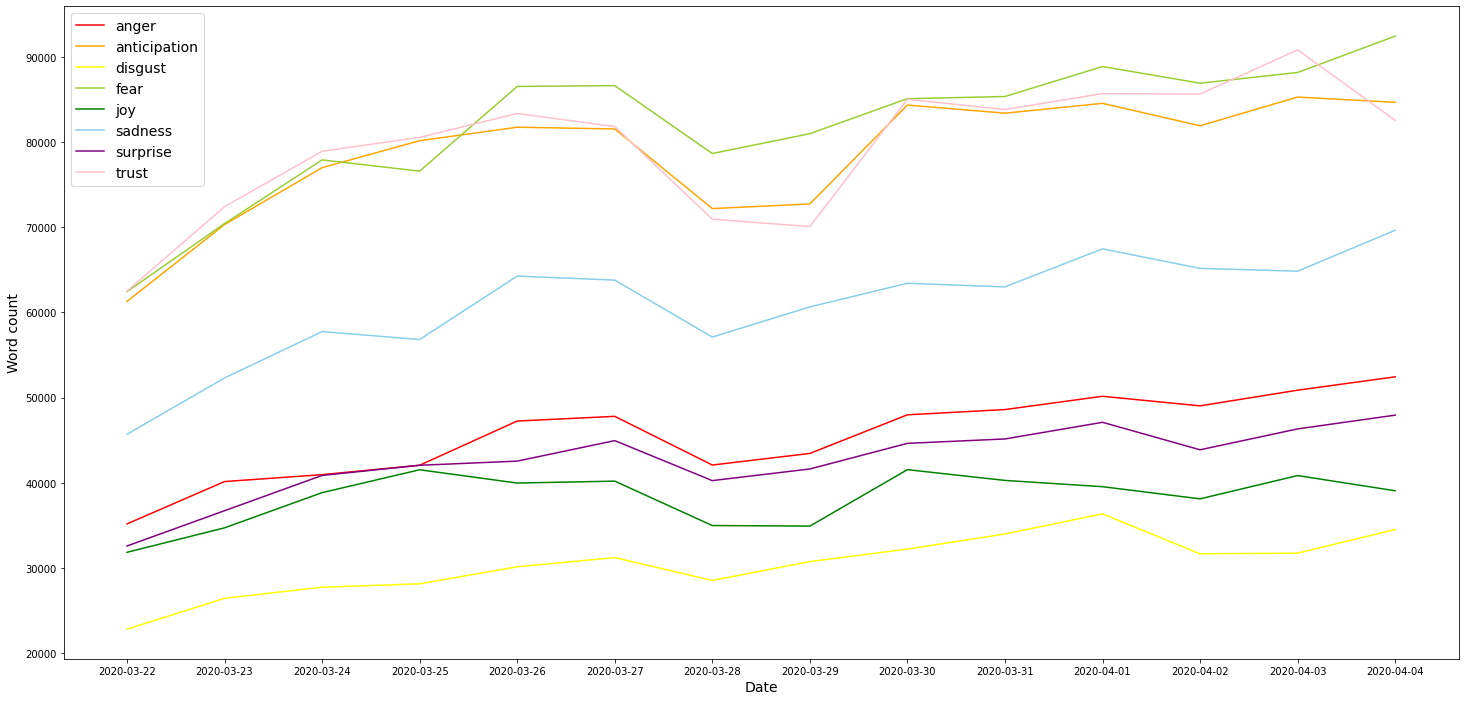

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 12))

plt.plot(daily_report.anger, color = 'red')
plt.plot(daily_report.anticipation, color = 'orange')
plt.plot(daily_report.disgust, color = 'yellow')
plt.plot(daily_report.fear, color = 'yellowgreen')
plt.plot(daily_report.joy, color = 'green')
plt.plot(daily_report.sadness, color = 'skyblue')
plt.plot(daily_report.surprise, color = 'purple')
plt.plot(daily_report.trust, color = 'pink')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.legend(sentiments, loc = 'best', fontsize = 14)
plt.show()

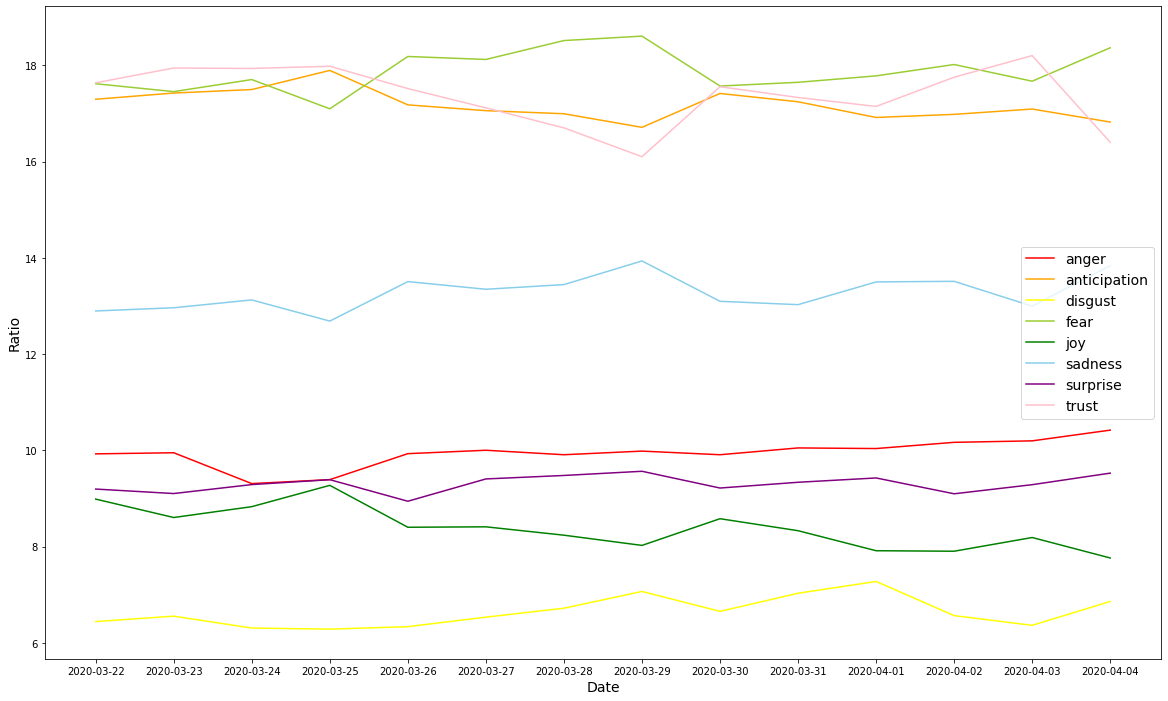

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))

plt.plot(daily_ratio.anger, color = 'red')
plt.plot(daily_ratio.anticipation, color = 'orange')
plt.plot(daily_ratio.disgust, color = 'yellow')
plt.plot(daily_ratio.fear, color = 'yellowgreen')
plt.plot(daily_ratio.joy, color = 'green')
plt.plot(daily_ratio.sadness, color = 'skyblue')
plt.plot(daily_ratio.surprise, color = 'purple')
plt.plot(daily_ratio.trust, color = 'pink')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Ratio", fontsize = 14)
plt.legend(sentiments, loc = 7, fontsize = 14)
plt.show()

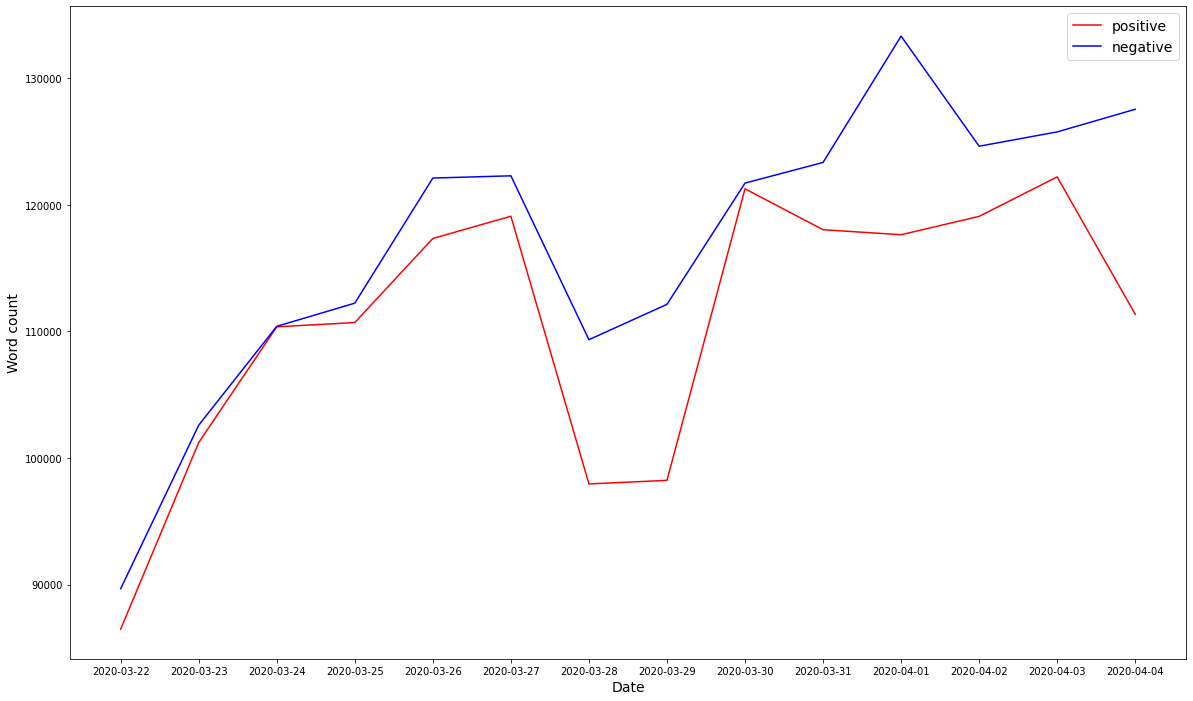

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))

plt.plot(origin_pn.positive, color = 'red')
plt.plot(origin_pn.negative, color = 'blue')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.legend(['positive', 'negative'], loc = 'best', fontsize = 14)
plt.show()

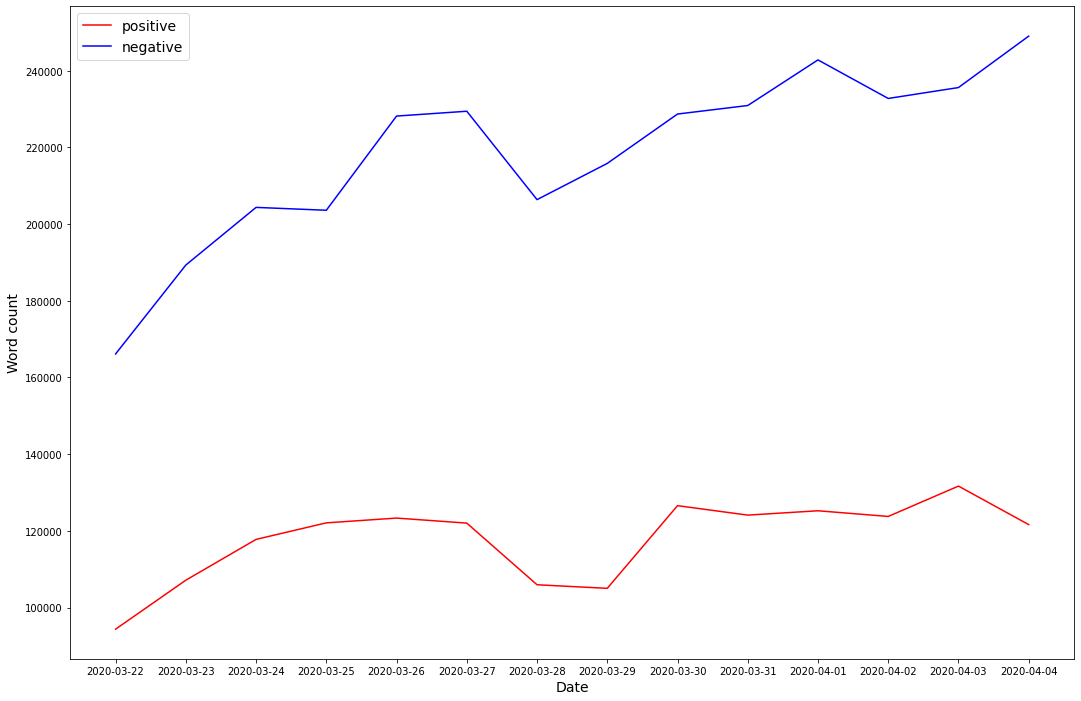

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))

plt.plot(daily_pn.positive, color = 'red')
plt.plot(daily_pn.negative, color = 'blue')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.legend(['positive', 'negative'], loc = 'best', fontsize = 14)
plt.show()

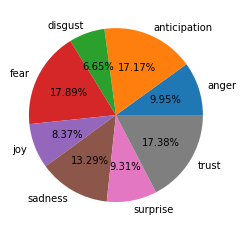

In [ ]:
plt.pie(sum_daily8, labels = sentiments, autopct = '%.2f%%') # 소수점 두자리까지 표시
plt.show()